In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [5]:
# Display all column names in the DataFrame
print(full_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


In [6]:
# Select relevant columns (use actual column names from the output above)
clustering_data = full_data[['CustomerID', 'Region', 'TotalSpending', 'PurchaseCount']]


KeyError: "['TotalSpending', 'PurchaseCount'] not in index"

In [7]:
# Display all column names in full_data
print(full_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


In [9]:
# Calculate total spending for each customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)


In [10]:
# Calculate purchase frequency for each customer
customer_frequency = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
customer_frequency.rename(columns={'TransactionID': 'PurchaseCount'}, inplace=True)


In [11]:
# Merge spending and frequency metrics
customer_metrics = pd.merge(customer_spending, customer_frequency, on='CustomerID', how='inner')

# Merge with customer information (assuming customers DataFrame has CustomerID and Region)
customer_data = pd.merge(customer_metrics, customers[['CustomerID', 'Region']], on='CustomerID', how='inner')


In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the 'Region' column
encoder = OneHotEncoder()
encoded_region = encoder.fit_transform(customer_data[['Region']]).toarray()

# Convert encoded regions to a DataFrame
encoded_region_df = pd.DataFrame(encoded_region, columns=encoder.get_feature_names_out(['Region']))

# Combine encoded regions with customer metrics
clustering_data = pd.concat([customer_data, encoded_region_df], axis=1)

# Drop unnecessary columns (e.g., CustomerID and Region)
clustering_data = clustering_data.drop(['CustomerID', 'Region'], axis=1)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)


In [13]:
from sklearn.cluster import KMeans

# Perform KMeans clustering (choose the number of clusters, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(normalized_data)



In [15]:
# Select relevant numeric columns for clustering (exclude string columns)
numeric_columns = customer_data.select_dtypes(include=['number'])

# Add the 'Cluster' column for grouping
numeric_columns['Cluster'] = customer_data['Cluster']


In [16]:
# Group by 'Cluster' and calculate mean only for numeric columns
segment_analysis = numeric_columns.groupby('Cluster').mean()

# Display the cluster-wise analysis
print(segment_analysis)


         TotalSpending  PurchaseCount
Cluster                              
0          3325.092600       4.680000
1          3606.092524       5.067961
2          3311.160870       5.304348


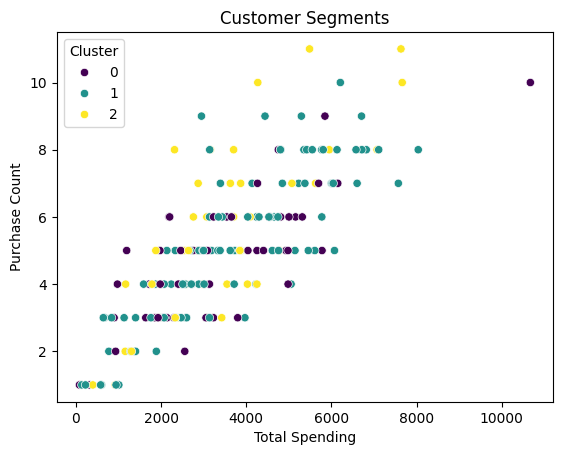

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of clusters
sns.scatterplot(
    x=customer_data['TotalSpending'],
    y=customer_data['PurchaseCount'],
    hue=customer_data['Cluster'],
    palette='viridis'
)
plt.title('Customer Segments')
plt.xlabel('Total Spending')
plt.ylabel('Purchase Count')
plt.show()


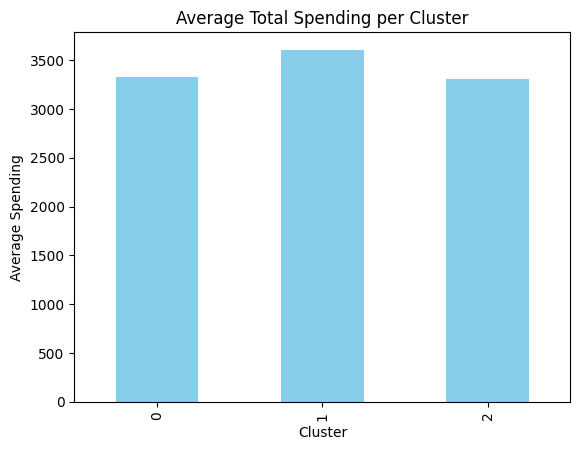

In [18]:
# Bar plot for average TotalSpending per cluster
segment_analysis['TotalSpending'].plot(kind='bar', color='skyblue')
plt.title('Average Total Spending per Cluster')
plt.ylabel('Average Spending')
plt.xlabel('Cluster')
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
numerical_columns = ['TotalSpending', 'PurchaseCount']  # Adjust based on your dataset
data_for_clustering = customer_data[numerical_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


In [21]:
from sklearn.cluster import KMeans

# Fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
customer_data['Cluster'] = kmeans.labels_


In [22]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
score = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.37724079925411


In [33]:
transactions = pd.read_csv(r"C:\Users\charv\OneDrive\Desktop\data\Transactions.csv")
customers = pd.read_csv(r"C:\Users\charv\OneDrive\Desktop\data\Customers.csv")



Silhouette Score: 0.3416427240049417
Davies-Bouldin Index: 1.0334171140953892

Cluster Analysis:
                    TotalValue  TransactionCount  ClusterSize
ClusterLabel                                                 
Dormant Customers  3950.821081          5.675676           74
Moderate Spenders  1912.453291          3.164557           79
Premium Customers  5359.804130          7.173913           46


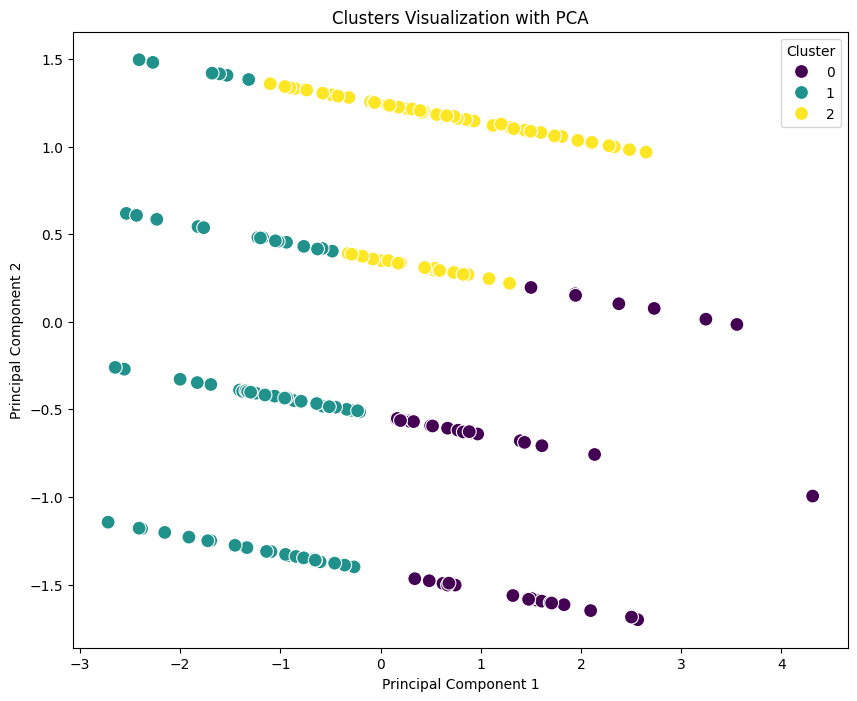

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Step 1: Load and preprocess the data
transactions = pd.read_csv(r"C:\Users\charv\OneDrive\Desktop\data\Transactions.csv")
customers = pd.read_csv(r"C:\Users\charv\OneDrive\Desktop\data\Customers.csv")

# Merge datasets on CustomerID
data = pd.merge(transactions, customers, on="CustomerID")

# Feature engineering: Aggregate transaction data for each customer
customer_summary = data.groupby("CustomerID").agg({
    "TotalValue": "sum",       # Total spending
    "TransactionID": "count",  # Transaction frequency
}).rename(columns={"TransactionID": "TransactionCount"})

# Add customer profile data
customer_summary = pd.merge(customer_summary, customers, on="CustomerID")

# Encode categorical variables (if any)
customer_summary["Region"] = customer_summary["Region"].astype("category").cat.codes

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary[["TotalValue", "TransactionCount", "Region"]])

# Step 2: Perform clustering
# Choosing the number of clusters (you can adjust this value)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_summary["Cluster"] = kmeans.fit_predict(scaled_features)

# Evaluate clustering performance
silhouette_avg = silhouette_score(scaled_features, customer_summary["Cluster"])
db_index = davies_bouldin_score(scaled_features, customer_summary["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")

# Step 3: Analyze and visualize clusters
# Add cluster labels for better interpretation
cluster_labels = {
    0: "Premium Customers",
    1: "Moderate Spenders",
    2: "Dormant Customers"
}
customer_summary["ClusterLabel"] = customer_summary["Cluster"].map(cluster_labels)

# Analyze cluster statistics
cluster_analysis = customer_summary.groupby("ClusterLabel").agg({
    "TotalValue": "mean",
    "TransactionCount": "mean",
    "CustomerID": "count"  # Cluster size
}).rename(columns={"CustomerID": "ClusterSize"})

print("\nCluster Analysis:")
print(cluster_analysis)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1], hue=customer_summary["Cluster"],
    palette="viridis", s=100
)
plt.title("Clusters Visualization with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 4: Save clustering results
customer_summary.to_csv(r"C:\Users\charv\OneDrive\Desktop\data\Clustered_Customers.csv", index=False)

# Save cluster analysis to a text file
with open(r"C:\Users\charv\OneDrive\Desktop\data\Cluster_Analysis_Report.txt", "w") as f:
    f.write(f"Silhouette Score: {silhouette_avg}\n")
    f.write(f"Davies-Bouldin Index: {db_index}\n\n")
    f.write("Cluster Analysis:\n")
    f.write(cluster_analysis.to_string())
